In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from math import sqrt

In [5]:
Food_Supply_Quantity_kg_dataset = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

In [6]:
Food_Supply_Quantity_kg_data = Food_Supply_Quantity_kg_dataset.fillna(0)
Food_Supply_Quantity_kg = Food_Supply_Quantity_kg_data.replace("<2.5", 2.5)
Food_Supply_Quantity_kg

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.005707,0.000168,0.000683,0.004855,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.027047,0.001085,0.016445,0.009517,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.009229,0.001037,0.004099,0.004094,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000086,0.000006,0.000022,0.000057,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,0,0.024742,0.003093,0.011340,0.010309,97000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.001168,0.000056,0.000498,0.000614,28516000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.000282,0.000000,0.000229,0.000053,95656000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.000021,0.000007,0.000003,0.000010,29162000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.000593,0.000017,0.000308,0.000269,17861000.0,%


In [7]:
X = Food_Supply_Quantity_kg[['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter','Miscellaneous','Offals','Oilcrops','Pulses','Spices','Starchy Roots','Stimulants','Sugar & Sweeteners','Sugar Crops','Treenuts','Vegetable Oils','Vegetables','Vegetal Products','Obesity','Population']]

y = Food_Supply_Quantity_kg['Deaths']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=5) #loss='ls')

# fit the model with the training data
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 


Target on train data [1.97032021e-02 7.04424453e-04 7.72071619e-04 6.10316547e-04
 5.43592689e-04 9.39286157e-04 1.23276742e-04 3.41360230e-04
 1.90404512e-02 1.68938889e-04 6.03568312e-05 2.90172102e-03
 7.12634707e-04 7.25294264e-04 1.15893076e-04 3.69558391e-04
 3.00811100e-04 2.19820835e-03 2.86890875e-04 2.82452965e-03
 1.58295904e-04 2.81582786e-04 4.00537588e-03 1.00826096e-04
 3.37182664e-04 2.19526562e-03 1.68095107e-03 4.56643951e-03
 1.16151406e-04 3.46118169e-03 3.62456865e-04 2.73714880e-04
 3.60463911e-04 2.69732160e-03 8.47896273e-05 1.36458297e-04
 3.58199671e-03 2.16073235e-04 3.43192327e-04 9.22431744e-03
 3.02748799e-04 1.25011595e-04 2.28724144e-04 7.61902035e-03
 2.32936604e-04 1.17105261e-03 9.32839542e-05 2.78288266e-04
 2.64476547e-04 1.29450252e-04 2.17717036e-04 4.21960012e-05
 2.35783116e-03 4.82322792e-04 3.92761139e-02 2.98056773e-03
 3.10312937e-05 1.03993817e-04 1.34517217e-04 6.50634529e-05
 5.53748644e-04 1.88600249e-04 7.41546244e-04 1.62100061e-03
 1

In [11]:
# Accuray Score on train dataset
rmse_train_gbr = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on new train dataset : ', rmse_train_gbr)


RMSE on new train dataset :  0.0003157928194201003


In [12]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test)


Target on test data [5.47129493e-04 1.29117559e-03 9.84293648e-03 8.69157012e-04
 1.10953560e-03 2.47265320e-04 6.76925462e-04 1.00275778e-02
 7.22476681e-04 3.15894595e-04 8.02750669e-04 9.74708617e-04
 1.62180645e-03 5.56756552e-04 5.92910718e-03 9.99429533e-03
 1.19475458e-04 3.55652617e-04 3.13657687e-04 2.43351607e-02
 5.64405560e-04 4.67929641e-04 5.07831558e-04 2.13546819e-03
 4.94196643e-04 3.17005705e-03 2.60878924e-03 1.96693173e-04
 1.25274394e-03 6.21956509e-04 9.30920258e-04 2.00637801e-02
 9.81115243e-03 4.90167308e-04 8.30002008e-04 2.05673200e-03
 4.95819330e-04 8.06443497e-05 6.50634529e-05 2.41922940e-04
 3.73172212e-03 1.86709243e-03 4.64489189e-03]


In [13]:
# Accuracy Score on test dataset
rmse_test_gbr = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on new test dataset : ', rmse_test_gbr)


RMSE on new test dataset :  0.00550698461892887


In [14]:
rmse_val = [] #to store rmse values for different depth_of_tree
for depth_of_tree in range(100):
    depth_of_tree = depth_of_tree+1
    model = GradientBoostingRegressor(max_depth=depth_of_tree)
    
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for depth_of_tree= ' , depth_of_tree , 'is:', error)
    #print('Minimum RMSE value for depth_of_tree= ' , depth_of_tree , 'is:', min(depth_of_tree))

RMSE value for depth_of_tree=  1 is: 0.006086348673618177
RMSE value for depth_of_tree=  2 is: 0.006693826970285084
RMSE value for depth_of_tree=  3 is: 0.006198823681162885
RMSE value for depth_of_tree=  4 is: 0.006847812207946149
RMSE value for depth_of_tree=  5 is: 0.005448490358033405
RMSE value for depth_of_tree=  6 is: 0.006381333432458902
RMSE value for depth_of_tree=  7 is: 0.0064773858818804025
RMSE value for depth_of_tree=  8 is: 0.006690483914841611
RMSE value for depth_of_tree=  9 is: 0.006663275806203891
RMSE value for depth_of_tree=  10 is: 0.006729809757223777
RMSE value for depth_of_tree=  11 is: 0.006560215770404385
RMSE value for depth_of_tree=  12 is: 0.0066720924609659045
RMSE value for depth_of_tree=  13 is: 0.006716746711685854
RMSE value for depth_of_tree=  14 is: 0.0066946291581549255
RMSE value for depth_of_tree=  15 is: 0.006579008825593752
RMSE value for depth_of_tree=  16 is: 0.006670401134608271
RMSE value for depth_of_tree=  17 is: 0.0066655910043701165
RM

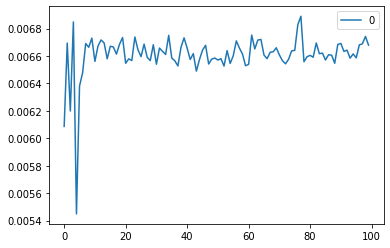

In [15]:
#plotting the rmse values against num_of_trees values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [16]:
rmse_val = [] #to store rmse values for different num_of_trees
for num_of_trees in range(100):
    num_of_trees = num_of_trees+1
    model = GradientBoostingRegressor(n_estimators=num_of_trees)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for num_of_trees= ' , num_of_trees , 'is:', error)
    #print('Minimum RMSE value for depth_of_tree= ' , depth_of_tree , 'is:', min(depth_of_tree))

RMSE value for num_of_trees=  1 is: 0.006955837106836431
RMSE value for num_of_trees=  2 is: 0.0068719099478753536
RMSE value for num_of_trees=  3 is: 0.00657455769440413
RMSE value for num_of_trees=  4 is: 0.006540685568042867
RMSE value for num_of_trees=  5 is: 0.006110731832765059
RMSE value for num_of_trees=  6 is: 0.006096420889925533
RMSE value for num_of_trees=  7 is: 0.006123703202578532
RMSE value for num_of_trees=  8 is: 0.005845807883786855
RMSE value for num_of_trees=  9 is: 0.005858440307471371
RMSE value for num_of_trees=  10 is: 0.006095096747328597
RMSE value for num_of_trees=  11 is: 0.005994486483329785
RMSE value for num_of_trees=  12 is: 0.006017811825956398
RMSE value for num_of_trees=  13 is: 0.006161755851500887
RMSE value for num_of_trees=  14 is: 0.005986824224231199
RMSE value for num_of_trees=  15 is: 0.00624348305315339
RMSE value for num_of_trees=  16 is: 0.005998205937290434
RMSE value for num_of_trees=  17 is: 0.0061426202764565405
RMSE value for num_of_t

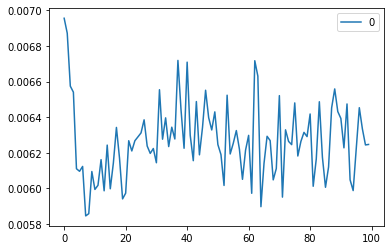

In [17]:
#plotting the rmse values against num_of_trees values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [18]:
model = GradientBoostingRegressor(n_estimators=15, max_depth= 5)

In [19]:
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value is = ', error)

RMSE value is =  0.006215439629016272


In [20]:
rmse_val = [] #to store rmse values for different num_of_trees
for num_of_trees in range(100):
    num_of_trees = num_of_trees+1
    for tree_depth in range(50):
        tree_depth = tree_depth+1
        model = GradientBoostingRegressor(n_estimators=num_of_trees, max_depth= tree_depth)

        model.fit(X_train, y_train)  #fit the model
        pred=model.predict(X_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        print('RMSE value for num_trees= ' , num_of_trees , 'and for tree_depth= ', tree_depth, 'is:', error)
        #print('Minimum RMSE value for num_of_trees= ' , num_of_trees , 'is:', min(num_of_trees))

RMSE value for num_trees=  1 and for tree_depth=  1 is: 0.006811682732564417
RMSE value for num_trees=  1 and for tree_depth=  2 is: 0.006898734115885712
RMSE value for num_trees=  1 and for tree_depth=  3 is: 0.006955837106836431
RMSE value for num_trees=  1 and for tree_depth=  4 is: 0.006905496672459487
RMSE value for num_trees=  1 and for tree_depth=  5 is: 0.006969181498720477
RMSE value for num_trees=  1 and for tree_depth=  6 is: 0.00674208698791257
RMSE value for num_trees=  1 and for tree_depth=  7 is: 0.006860959359606395
RMSE value for num_trees=  1 and for tree_depth=  8 is: 0.006841368639253231
RMSE value for num_trees=  1 and for tree_depth=  9 is: 0.0068642224513573
RMSE value for num_trees=  1 and for tree_depth=  10 is: 0.006728100733807206
RMSE value for num_trees=  1 and for tree_depth=  11 is: 0.0068911065563453345
RMSE value for num_trees=  1 and for tree_depth=  12 is: 0.00683703491749324
RMSE value for num_trees=  1 and for tree_depth=  13 is: 0.00688732550512870

RMSE value for num_trees=  3 and for tree_depth=  16 is: 0.006601250284168209
RMSE value for num_trees=  3 and for tree_depth=  17 is: 0.006608219745644226
RMSE value for num_trees=  3 and for tree_depth=  18 is: 0.006500594557187341
RMSE value for num_trees=  3 and for tree_depth=  19 is: 0.006616863321092241
RMSE value for num_trees=  3 and for tree_depth=  20 is: 0.006636280120655354
RMSE value for num_trees=  3 and for tree_depth=  21 is: 0.006614517407005939
RMSE value for num_trees=  3 and for tree_depth=  22 is: 0.006659045445827741
RMSE value for num_trees=  3 and for tree_depth=  23 is: 0.006609654388795029
RMSE value for num_trees=  3 and for tree_depth=  24 is: 0.006708305554776244
RMSE value for num_trees=  3 and for tree_depth=  25 is: 0.006508945557284907
RMSE value for num_trees=  3 and for tree_depth=  26 is: 0.006480200482456676
RMSE value for num_trees=  3 and for tree_depth=  27 is: 0.00667638056244151
RMSE value for num_trees=  3 and for tree_depth=  28 is: 0.006571

RMSE value for num_trees=  5 and for tree_depth=  23 is: 0.0064451871996042106
RMSE value for num_trees=  5 and for tree_depth=  24 is: 0.006451742170661838
RMSE value for num_trees=  5 and for tree_depth=  25 is: 0.006477972515627743
RMSE value for num_trees=  5 and for tree_depth=  26 is: 0.006512927603211884
RMSE value for num_trees=  5 and for tree_depth=  27 is: 0.00642212525712378
RMSE value for num_trees=  5 and for tree_depth=  28 is: 0.00640630616495191
RMSE value for num_trees=  5 and for tree_depth=  29 is: 0.006372235133203707
RMSE value for num_trees=  5 and for tree_depth=  30 is: 0.0064860964188237745
RMSE value for num_trees=  5 and for tree_depth=  31 is: 0.0065168858455416055
RMSE value for num_trees=  5 and for tree_depth=  32 is: 0.006547618906980923
RMSE value for num_trees=  5 and for tree_depth=  33 is: 0.006495940375337529
RMSE value for num_trees=  5 and for tree_depth=  34 is: 0.006340899495413921
RMSE value for num_trees=  5 and for tree_depth=  35 is: 0.0065

RMSE value for num_trees=  7 and for tree_depth=  31 is: 0.006399451196988711
RMSE value for num_trees=  7 and for tree_depth=  32 is: 0.0064651900388837166
RMSE value for num_trees=  7 and for tree_depth=  33 is: 0.0065673893122330015
RMSE value for num_trees=  7 and for tree_depth=  34 is: 0.006449325067080252
RMSE value for num_trees=  7 and for tree_depth=  35 is: 0.006517144923911214
RMSE value for num_trees=  7 and for tree_depth=  36 is: 0.006426376289595502
RMSE value for num_trees=  7 and for tree_depth=  37 is: 0.006420031178628532
RMSE value for num_trees=  7 and for tree_depth=  38 is: 0.006439485572952666
RMSE value for num_trees=  7 and for tree_depth=  39 is: 0.006518409225875391
RMSE value for num_trees=  7 and for tree_depth=  40 is: 0.006499687214996737
RMSE value for num_trees=  7 and for tree_depth=  41 is: 0.006571447219571705
RMSE value for num_trees=  7 and for tree_depth=  42 is: 0.0064481382096780275
RMSE value for num_trees=  7 and for tree_depth=  43 is: 0.00

RMSE value for num_trees=  9 and for tree_depth=  40 is: 0.006427908061326406
RMSE value for num_trees=  9 and for tree_depth=  41 is: 0.0065199923097504124
RMSE value for num_trees=  9 and for tree_depth=  42 is: 0.0064924461760734855
RMSE value for num_trees=  9 and for tree_depth=  43 is: 0.006514248051514306
RMSE value for num_trees=  9 and for tree_depth=  44 is: 0.006427281845051644
RMSE value for num_trees=  9 and for tree_depth=  45 is: 0.006447973472442769
RMSE value for num_trees=  9 and for tree_depth=  46 is: 0.006472748769393012
RMSE value for num_trees=  9 and for tree_depth=  47 is: 0.006459181901648317
RMSE value for num_trees=  9 and for tree_depth=  48 is: 0.006436708901520461
RMSE value for num_trees=  9 and for tree_depth=  49 is: 0.006419755367341382
RMSE value for num_trees=  9 and for tree_depth=  50 is: 0.006523233673918664
RMSE value for num_trees=  10 and for tree_depth=  1 is: 0.005875077409540801
RMSE value for num_trees=  10 and for tree_depth=  2 is: 0.006

RMSE value for num_trees=  11 and for tree_depth=  50 is: 0.006496326223992786
RMSE value for num_trees=  12 and for tree_depth=  1 is: 0.005816421003433096
RMSE value for num_trees=  12 and for tree_depth=  2 is: 0.006651823728206826
RMSE value for num_trees=  12 and for tree_depth=  3 is: 0.0061805077987217
RMSE value for num_trees=  12 and for tree_depth=  4 is: 0.006277477452680055
RMSE value for num_trees=  12 and for tree_depth=  5 is: 0.006415011476437899
RMSE value for num_trees=  12 and for tree_depth=  6 is: 0.006510325107450722
RMSE value for num_trees=  12 and for tree_depth=  7 is: 0.006568858146936348
RMSE value for num_trees=  12 and for tree_depth=  8 is: 0.006517052655958619
RMSE value for num_trees=  12 and for tree_depth=  9 is: 0.006565131575144327
RMSE value for num_trees=  12 and for tree_depth=  10 is: 0.006558452738021276
RMSE value for num_trees=  12 and for tree_depth=  11 is: 0.006579263193440032
RMSE value for num_trees=  12 and for tree_depth=  12 is: 0.006

RMSE value for num_trees=  14 and for tree_depth=  10 is: 0.006574872736192912
RMSE value for num_trees=  14 and for tree_depth=  11 is: 0.006690107461862523
RMSE value for num_trees=  14 and for tree_depth=  12 is: 0.006558441667960824
RMSE value for num_trees=  14 and for tree_depth=  13 is: 0.006668977494265499
RMSE value for num_trees=  14 and for tree_depth=  14 is: 0.006556926686164173
RMSE value for num_trees=  14 and for tree_depth=  15 is: 0.00666575446977694
RMSE value for num_trees=  14 and for tree_depth=  16 is: 0.006608754951839717
RMSE value for num_trees=  14 and for tree_depth=  17 is: 0.006573696828678881
RMSE value for num_trees=  14 and for tree_depth=  18 is: 0.006585439037012445
RMSE value for num_trees=  14 and for tree_depth=  19 is: 0.006601669526840281
RMSE value for num_trees=  14 and for tree_depth=  20 is: 0.006599286408754613
RMSE value for num_trees=  14 and for tree_depth=  21 is: 0.006570868529950318
RMSE value for num_trees=  14 and for tree_depth=  22

RMSE value for num_trees=  16 and for tree_depth=  20 is: 0.006705823323946139
RMSE value for num_trees=  16 and for tree_depth=  21 is: 0.006674055607901749
RMSE value for num_trees=  16 and for tree_depth=  22 is: 0.006699686579945219
RMSE value for num_trees=  16 and for tree_depth=  23 is: 0.006702097005896806
RMSE value for num_trees=  16 and for tree_depth=  24 is: 0.0066242989172051745
RMSE value for num_trees=  16 and for tree_depth=  25 is: 0.006632220790889015
RMSE value for num_trees=  16 and for tree_depth=  26 is: 0.006795747052035748
RMSE value for num_trees=  16 and for tree_depth=  27 is: 0.006665921304533358
RMSE value for num_trees=  16 and for tree_depth=  28 is: 0.0066544964734713335
RMSE value for num_trees=  16 and for tree_depth=  29 is: 0.006781273696373473
RMSE value for num_trees=  16 and for tree_depth=  30 is: 0.006693640949768281
RMSE value for num_trees=  16 and for tree_depth=  31 is: 0.006606648574277799
RMSE value for num_trees=  16 and for tree_depth= 

RMSE value for num_trees=  18 and for tree_depth=  25 is: 0.006895710489326449
RMSE value for num_trees=  18 and for tree_depth=  26 is: 0.006676129927133225
RMSE value for num_trees=  18 and for tree_depth=  27 is: 0.0066930123877577685
RMSE value for num_trees=  18 and for tree_depth=  28 is: 0.006760654689534589
RMSE value for num_trees=  18 and for tree_depth=  29 is: 0.006678403114013109
RMSE value for num_trees=  18 and for tree_depth=  30 is: 0.006682739720088968
RMSE value for num_trees=  18 and for tree_depth=  31 is: 0.006711039991348982
RMSE value for num_trees=  18 and for tree_depth=  32 is: 0.006656407202412339
RMSE value for num_trees=  18 and for tree_depth=  33 is: 0.006718373667342662
RMSE value for num_trees=  18 and for tree_depth=  34 is: 0.0067010591173313015
RMSE value for num_trees=  18 and for tree_depth=  35 is: 0.006691427217472351
RMSE value for num_trees=  18 and for tree_depth=  36 is: 0.0066680856016743196
RMSE value for num_trees=  18 and for tree_depth=

RMSE value for num_trees=  20 and for tree_depth=  30 is: 0.006661299715017374
RMSE value for num_trees=  20 and for tree_depth=  31 is: 0.006908189388894609
RMSE value for num_trees=  20 and for tree_depth=  32 is: 0.006705753039906027
RMSE value for num_trees=  20 and for tree_depth=  33 is: 0.006743330909319449
RMSE value for num_trees=  20 and for tree_depth=  34 is: 0.00679063505126417
RMSE value for num_trees=  20 and for tree_depth=  35 is: 0.006720496712069277
RMSE value for num_trees=  20 and for tree_depth=  36 is: 0.006752651360249647
RMSE value for num_trees=  20 and for tree_depth=  37 is: 0.006737944531390332
RMSE value for num_trees=  20 and for tree_depth=  38 is: 0.00682255358690224
RMSE value for num_trees=  20 and for tree_depth=  39 is: 0.006808877697980513
RMSE value for num_trees=  20 and for tree_depth=  40 is: 0.006766837637243202
RMSE value for num_trees=  20 and for tree_depth=  41 is: 0.00678097787987874
RMSE value for num_trees=  20 and for tree_depth=  42 i

RMSE value for num_trees=  22 and for tree_depth=  35 is: 0.006800709266589881
RMSE value for num_trees=  22 and for tree_depth=  36 is: 0.006662523689312819
RMSE value for num_trees=  22 and for tree_depth=  37 is: 0.006937853242920455
RMSE value for num_trees=  22 and for tree_depth=  38 is: 0.006791781850977144
RMSE value for num_trees=  22 and for tree_depth=  39 is: 0.00686302475560245
RMSE value for num_trees=  22 and for tree_depth=  40 is: 0.006757049041562588
RMSE value for num_trees=  22 and for tree_depth=  41 is: 0.0067821007026598315
RMSE value for num_trees=  22 and for tree_depth=  42 is: 0.0068516189720568815
RMSE value for num_trees=  22 and for tree_depth=  43 is: 0.006739074326462709
RMSE value for num_trees=  22 and for tree_depth=  44 is: 0.006788885386399529
RMSE value for num_trees=  22 and for tree_depth=  45 is: 0.006818516455818111
RMSE value for num_trees=  22 and for tree_depth=  46 is: 0.006771474241790954
RMSE value for num_trees=  22 and for tree_depth=  

RMSE value for num_trees=  24 and for tree_depth=  40 is: 0.006721254594556346
RMSE value for num_trees=  24 and for tree_depth=  41 is: 0.006731765340679235
RMSE value for num_trees=  24 and for tree_depth=  42 is: 0.006805702980663707
RMSE value for num_trees=  24 and for tree_depth=  43 is: 0.0067014663691619385
RMSE value for num_trees=  24 and for tree_depth=  44 is: 0.006695131611964581
RMSE value for num_trees=  24 and for tree_depth=  45 is: 0.006748891622639215
RMSE value for num_trees=  24 and for tree_depth=  46 is: 0.006828882014766001
RMSE value for num_trees=  24 and for tree_depth=  47 is: 0.006748790808401038
RMSE value for num_trees=  24 and for tree_depth=  48 is: 0.006715162408495607
RMSE value for num_trees=  24 and for tree_depth=  49 is: 0.0067196276417213156
RMSE value for num_trees=  24 and for tree_depth=  50 is: 0.006741720517399116
RMSE value for num_trees=  25 and for tree_depth=  1 is: 0.005764656608389063
RMSE value for num_trees=  25 and for tree_depth=  

RMSE value for num_trees=  26 and for tree_depth=  44 is: 0.006811327133347313
RMSE value for num_trees=  26 and for tree_depth=  45 is: 0.006786213213920691
RMSE value for num_trees=  26 and for tree_depth=  46 is: 0.006728761826229609
RMSE value for num_trees=  26 and for tree_depth=  47 is: 0.006755738782036723
RMSE value for num_trees=  26 and for tree_depth=  48 is: 0.006818412373122909
RMSE value for num_trees=  26 and for tree_depth=  49 is: 0.006745242321365357
RMSE value for num_trees=  26 and for tree_depth=  50 is: 0.0067092468605107446
RMSE value for num_trees=  27 and for tree_depth=  1 is: 0.005807657652193654
RMSE value for num_trees=  27 and for tree_depth=  2 is: 0.0067526116515556865
RMSE value for num_trees=  27 and for tree_depth=  3 is: 0.0063747926448791455
RMSE value for num_trees=  27 and for tree_depth=  4 is: 0.006908667855856566
RMSE value for num_trees=  27 and for tree_depth=  5 is: 0.005595291363526058
RMSE value for num_trees=  27 and for tree_depth=  6 i

RMSE value for num_trees=  28 and for tree_depth=  49 is: 0.006668833243496283
RMSE value for num_trees=  28 and for tree_depth=  50 is: 0.006749880435568581
RMSE value for num_trees=  29 and for tree_depth=  1 is: 0.005805147671966541
RMSE value for num_trees=  29 and for tree_depth=  2 is: 0.006753650214200191
RMSE value for num_trees=  29 and for tree_depth=  3 is: 0.00598494322696391
RMSE value for num_trees=  29 and for tree_depth=  4 is: 0.006651385039092621
RMSE value for num_trees=  29 and for tree_depth=  5 is: 0.0054542015761515905
RMSE value for num_trees=  29 and for tree_depth=  6 is: 0.006508572449579494
RMSE value for num_trees=  29 and for tree_depth=  7 is: 0.006708000972068381
RMSE value for num_trees=  29 and for tree_depth=  8 is: 0.006648037391292907
RMSE value for num_trees=  29 and for tree_depth=  9 is: 0.006604950020070111
RMSE value for num_trees=  29 and for tree_depth=  10 is: 0.006642956432199837
RMSE value for num_trees=  29 and for tree_depth=  11 is: 0.0

RMSE value for num_trees=  31 and for tree_depth=  4 is: 0.006667552533249924
RMSE value for num_trees=  31 and for tree_depth=  5 is: 0.005433674276474761
RMSE value for num_trees=  31 and for tree_depth=  6 is: 0.006428403606059347
RMSE value for num_trees=  31 and for tree_depth=  7 is: 0.006694732346310321
RMSE value for num_trees=  31 and for tree_depth=  8 is: 0.006685108478410982
RMSE value for num_trees=  31 and for tree_depth=  9 is: 0.00664666382659353
RMSE value for num_trees=  31 and for tree_depth=  10 is: 0.006580441524123516
RMSE value for num_trees=  31 and for tree_depth=  11 is: 0.006653475398924639
RMSE value for num_trees=  31 and for tree_depth=  12 is: 0.006671973512585018
RMSE value for num_trees=  31 and for tree_depth=  13 is: 0.006716056378711515
RMSE value for num_trees=  31 and for tree_depth=  14 is: 0.006716603411813717
RMSE value for num_trees=  31 and for tree_depth=  15 is: 0.006829580810209613
RMSE value for num_trees=  31 and for tree_depth=  16 is: 0

RMSE value for num_trees=  33 and for tree_depth=  12 is: 0.006655173100600385
RMSE value for num_trees=  33 and for tree_depth=  13 is: 0.00664348502924509
RMSE value for num_trees=  33 and for tree_depth=  14 is: 0.006630607669423009
RMSE value for num_trees=  33 and for tree_depth=  15 is: 0.006822067435562494
RMSE value for num_trees=  33 and for tree_depth=  16 is: 0.006614169342910679
RMSE value for num_trees=  33 and for tree_depth=  17 is: 0.006652702389535463
RMSE value for num_trees=  33 and for tree_depth=  18 is: 0.006659808080668648
RMSE value for num_trees=  33 and for tree_depth=  19 is: 0.006675961640563824
RMSE value for num_trees=  33 and for tree_depth=  20 is: 0.0066463723232099104
RMSE value for num_trees=  33 and for tree_depth=  21 is: 0.006664552627815414
RMSE value for num_trees=  33 and for tree_depth=  22 is: 0.0066620027110356915
RMSE value for num_trees=  33 and for tree_depth=  23 is: 0.006663499423010966
RMSE value for num_trees=  33 and for tree_depth=  

RMSE value for num_trees=  35 and for tree_depth=  17 is: 0.006545225492808131
RMSE value for num_trees=  35 and for tree_depth=  18 is: 0.00668141452540584
RMSE value for num_trees=  35 and for tree_depth=  19 is: 0.006701541223546014
RMSE value for num_trees=  35 and for tree_depth=  20 is: 0.006679212836660303
RMSE value for num_trees=  35 and for tree_depth=  21 is: 0.006617465589516925
RMSE value for num_trees=  35 and for tree_depth=  22 is: 0.006639263144850188
RMSE value for num_trees=  35 and for tree_depth=  23 is: 0.00673349867244318
RMSE value for num_trees=  35 and for tree_depth=  24 is: 0.006681229092091854
RMSE value for num_trees=  35 and for tree_depth=  25 is: 0.006619230909468093
RMSE value for num_trees=  35 and for tree_depth=  26 is: 0.006612237817229228
RMSE value for num_trees=  35 and for tree_depth=  27 is: 0.006544056745770176
RMSE value for num_trees=  35 and for tree_depth=  28 is: 0.006732595091444694
RMSE value for num_trees=  35 and for tree_depth=  29 

RMSE value for num_trees=  37 and for tree_depth=  21 is: 0.0065678351362622464
RMSE value for num_trees=  37 and for tree_depth=  22 is: 0.0065823122652727845
RMSE value for num_trees=  37 and for tree_depth=  23 is: 0.006590438221455564
RMSE value for num_trees=  37 and for tree_depth=  24 is: 0.006579036715930755
RMSE value for num_trees=  37 and for tree_depth=  25 is: 0.006584865567009359
RMSE value for num_trees=  37 and for tree_depth=  26 is: 0.006720854497477351
RMSE value for num_trees=  37 and for tree_depth=  27 is: 0.006501527410160274
RMSE value for num_trees=  37 and for tree_depth=  28 is: 0.006551183636776154
RMSE value for num_trees=  37 and for tree_depth=  29 is: 0.0066321212002354805
RMSE value for num_trees=  37 and for tree_depth=  30 is: 0.006556115087639323
RMSE value for num_trees=  37 and for tree_depth=  31 is: 0.006511575731962066
RMSE value for num_trees=  37 and for tree_depth=  32 is: 0.00661511767515295
RMSE value for num_trees=  37 and for tree_depth= 

RMSE value for num_trees=  39 and for tree_depth=  27 is: 0.006565446909054054
RMSE value for num_trees=  39 and for tree_depth=  28 is: 0.006607955016847135
RMSE value for num_trees=  39 and for tree_depth=  29 is: 0.006691450172771508
RMSE value for num_trees=  39 and for tree_depth=  30 is: 0.006781590297283855
RMSE value for num_trees=  39 and for tree_depth=  31 is: 0.006784840377732167
RMSE value for num_trees=  39 and for tree_depth=  32 is: 0.006516619088814348
RMSE value for num_trees=  39 and for tree_depth=  33 is: 0.006591693639912822
RMSE value for num_trees=  39 and for tree_depth=  34 is: 0.006613223691295886
RMSE value for num_trees=  39 and for tree_depth=  35 is: 0.006565059185264493
RMSE value for num_trees=  39 and for tree_depth=  36 is: 0.006592175183810521
RMSE value for num_trees=  39 and for tree_depth=  37 is: 0.006635975985414572
RMSE value for num_trees=  39 and for tree_depth=  38 is: 0.006588361535690884
RMSE value for num_trees=  39 and for tree_depth=  3

RMSE value for num_trees=  41 and for tree_depth=  34 is: 0.006621962954225319
RMSE value for num_trees=  41 and for tree_depth=  35 is: 0.006596884142504796
RMSE value for num_trees=  41 and for tree_depth=  36 is: 0.006724154893482495
RMSE value for num_trees=  41 and for tree_depth=  37 is: 0.006669682651787305
RMSE value for num_trees=  41 and for tree_depth=  38 is: 0.006682357429192325
RMSE value for num_trees=  41 and for tree_depth=  39 is: 0.006615722953593675
RMSE value for num_trees=  41 and for tree_depth=  40 is: 0.006605685609125802
RMSE value for num_trees=  41 and for tree_depth=  41 is: 0.006651506649874352
RMSE value for num_trees=  41 and for tree_depth=  42 is: 0.006627065578794751
RMSE value for num_trees=  41 and for tree_depth=  43 is: 0.006601309834818821
RMSE value for num_trees=  41 and for tree_depth=  44 is: 0.0065885764340658706
RMSE value for num_trees=  41 and for tree_depth=  45 is: 0.0065896830723029326
RMSE value for num_trees=  41 and for tree_depth= 

RMSE value for num_trees=  43 and for tree_depth=  42 is: 0.006677581840282335
RMSE value for num_trees=  43 and for tree_depth=  43 is: 0.0065936151019702054
RMSE value for num_trees=  43 and for tree_depth=  44 is: 0.00658713088919491
RMSE value for num_trees=  43 and for tree_depth=  45 is: 0.006599878272905274
RMSE value for num_trees=  43 and for tree_depth=  46 is: 0.00660600340158068
RMSE value for num_trees=  43 and for tree_depth=  47 is: 0.006626371777442112
RMSE value for num_trees=  43 and for tree_depth=  48 is: 0.0066439450358797185
RMSE value for num_trees=  43 and for tree_depth=  49 is: 0.0065414777595440565
RMSE value for num_trees=  43 and for tree_depth=  50 is: 0.006567165667344824
RMSE value for num_trees=  44 and for tree_depth=  1 is: 0.005844843895840357
RMSE value for num_trees=  44 and for tree_depth=  2 is: 0.006583186615702894
RMSE value for num_trees=  44 and for tree_depth=  3 is: 0.0065050938498115215
RMSE value for num_trees=  44 and for tree_depth=  4 

RMSE value for num_trees=  45 and for tree_depth=  50 is: 0.006618814358541791
RMSE value for num_trees=  46 and for tree_depth=  1 is: 0.005832614462317056
RMSE value for num_trees=  46 and for tree_depth=  2 is: 0.006556254457409961
RMSE value for num_trees=  46 and for tree_depth=  3 is: 0.00638692634651702
RMSE value for num_trees=  46 and for tree_depth=  4 is: 0.006662455243687905
RMSE value for num_trees=  46 and for tree_depth=  5 is: 0.005781396697696553
RMSE value for num_trees=  46 and for tree_depth=  6 is: 0.006391817190462968
RMSE value for num_trees=  46 and for tree_depth=  7 is: 0.006630207374900768
RMSE value for num_trees=  46 and for tree_depth=  8 is: 0.006689271005935275
RMSE value for num_trees=  46 and for tree_depth=  9 is: 0.006584008548457895
RMSE value for num_trees=  46 and for tree_depth=  10 is: 0.006617970598538593
RMSE value for num_trees=  46 and for tree_depth=  11 is: 0.006543800703749571
RMSE value for num_trees=  46 and for tree_depth=  12 is: 0.00

RMSE value for num_trees=  48 and for tree_depth=  4 is: 0.00662256878604901
RMSE value for num_trees=  48 and for tree_depth=  5 is: 0.00531999564020825
RMSE value for num_trees=  48 and for tree_depth=  6 is: 0.006373743473602477
RMSE value for num_trees=  48 and for tree_depth=  7 is: 0.00651042943486955
RMSE value for num_trees=  48 and for tree_depth=  8 is: 0.006597415809868763
RMSE value for num_trees=  48 and for tree_depth=  9 is: 0.006691917589360797
RMSE value for num_trees=  48 and for tree_depth=  10 is: 0.006720736928398109
RMSE value for num_trees=  48 and for tree_depth=  11 is: 0.006600255704369732
RMSE value for num_trees=  48 and for tree_depth=  12 is: 0.006755212869575474
RMSE value for num_trees=  48 and for tree_depth=  13 is: 0.006639102556780439
RMSE value for num_trees=  48 and for tree_depth=  14 is: 0.006722878549856503
RMSE value for num_trees=  48 and for tree_depth=  15 is: 0.006651362165371285
RMSE value for num_trees=  48 and for tree_depth=  16 is: 0.0

RMSE value for num_trees=  50 and for tree_depth=  8 is: 0.006693441230011093
RMSE value for num_trees=  50 and for tree_depth=  9 is: 0.0066309829092260535
RMSE value for num_trees=  50 and for tree_depth=  10 is: 0.0066126742253640874
RMSE value for num_trees=  50 and for tree_depth=  11 is: 0.006644991667033426
RMSE value for num_trees=  50 and for tree_depth=  12 is: 0.006631211625558096
RMSE value for num_trees=  50 and for tree_depth=  13 is: 0.0065926019297504876
RMSE value for num_trees=  50 and for tree_depth=  14 is: 0.00658364230124538
RMSE value for num_trees=  50 and for tree_depth=  15 is: 0.0066178943652882806
RMSE value for num_trees=  50 and for tree_depth=  16 is: 0.006753537282815023
RMSE value for num_trees=  50 and for tree_depth=  17 is: 0.00675645589851834
RMSE value for num_trees=  50 and for tree_depth=  18 is: 0.006596507294190917
RMSE value for num_trees=  50 and for tree_depth=  19 is: 0.006553530624684265
RMSE value for num_trees=  50 and for tree_depth=  2

RMSE value for num_trees=  52 and for tree_depth=  13 is: 0.006886150055201949
RMSE value for num_trees=  52 and for tree_depth=  14 is: 0.006542561374754572
RMSE value for num_trees=  52 and for tree_depth=  15 is: 0.006639335937957179
RMSE value for num_trees=  52 and for tree_depth=  16 is: 0.006606963838349367
RMSE value for num_trees=  52 and for tree_depth=  17 is: 0.006682058618349102
RMSE value for num_trees=  52 and for tree_depth=  18 is: 0.006665201590074102
RMSE value for num_trees=  52 and for tree_depth=  19 is: 0.006657413241388522
RMSE value for num_trees=  52 and for tree_depth=  20 is: 0.006649728372612568
RMSE value for num_trees=  52 and for tree_depth=  21 is: 0.006596745331660962
RMSE value for num_trees=  52 and for tree_depth=  22 is: 0.006617633772144782
RMSE value for num_trees=  52 and for tree_depth=  23 is: 0.006597632006384906
RMSE value for num_trees=  52 and for tree_depth=  24 is: 0.006555623013898893
RMSE value for num_trees=  52 and for tree_depth=  2

RMSE value for num_trees=  54 and for tree_depth=  17 is: 0.006628492313577214
RMSE value for num_trees=  54 and for tree_depth=  18 is: 0.0066067505483263355
RMSE value for num_trees=  54 and for tree_depth=  19 is: 0.006528455658177276
RMSE value for num_trees=  54 and for tree_depth=  20 is: 0.006584716519631491
RMSE value for num_trees=  54 and for tree_depth=  21 is: 0.006581025054888395
RMSE value for num_trees=  54 and for tree_depth=  22 is: 0.00661195319514844
RMSE value for num_trees=  54 and for tree_depth=  23 is: 0.006595150619327711
RMSE value for num_trees=  54 and for tree_depth=  24 is: 0.006623137864361078
RMSE value for num_trees=  54 and for tree_depth=  25 is: 0.006665408245581965
RMSE value for num_trees=  54 and for tree_depth=  26 is: 0.006508769023279824
RMSE value for num_trees=  54 and for tree_depth=  27 is: 0.00661214123301413
RMSE value for num_trees=  54 and for tree_depth=  28 is: 0.0066458557577859555
RMSE value for num_trees=  54 and for tree_depth=  2

RMSE value for num_trees=  56 and for tree_depth=  24 is: 0.006543234993168847
RMSE value for num_trees=  56 and for tree_depth=  25 is: 0.0066849688380345735
RMSE value for num_trees=  56 and for tree_depth=  26 is: 0.006613705342597738
RMSE value for num_trees=  56 and for tree_depth=  27 is: 0.006665854672643728
RMSE value for num_trees=  56 and for tree_depth=  28 is: 0.006607146230471753
RMSE value for num_trees=  56 and for tree_depth=  29 is: 0.006565308792227723
RMSE value for num_trees=  56 and for tree_depth=  30 is: 0.0065897886089378716
RMSE value for num_trees=  56 and for tree_depth=  31 is: 0.006618863757538588
RMSE value for num_trees=  56 and for tree_depth=  32 is: 0.006622735434422585
RMSE value for num_trees=  56 and for tree_depth=  33 is: 0.0065423584460908854
RMSE value for num_trees=  56 and for tree_depth=  34 is: 0.006577802072801397
RMSE value for num_trees=  56 and for tree_depth=  35 is: 0.0066854644896753345
RMSE value for num_trees=  56 and for tree_depth

RMSE value for num_trees=  58 and for tree_depth=  28 is: 0.006635352448737858
RMSE value for num_trees=  58 and for tree_depth=  29 is: 0.006657525010620228
RMSE value for num_trees=  58 and for tree_depth=  30 is: 0.006598880963570459
RMSE value for num_trees=  58 and for tree_depth=  31 is: 0.006730963347924717
RMSE value for num_trees=  58 and for tree_depth=  32 is: 0.006663551041193278
RMSE value for num_trees=  58 and for tree_depth=  33 is: 0.006631467420367583
RMSE value for num_trees=  58 and for tree_depth=  34 is: 0.0065375191343801905
RMSE value for num_trees=  58 and for tree_depth=  35 is: 0.006546278267273254
RMSE value for num_trees=  58 and for tree_depth=  36 is: 0.006590554147575503
RMSE value for num_trees=  58 and for tree_depth=  37 is: 0.0066697759897611075
RMSE value for num_trees=  58 and for tree_depth=  38 is: 0.006590543001916464
RMSE value for num_trees=  58 and for tree_depth=  39 is: 0.006605807900339611
RMSE value for num_trees=  58 and for tree_depth= 

RMSE value for num_trees=  60 and for tree_depth=  32 is: 0.006591328466653951
RMSE value for num_trees=  60 and for tree_depth=  33 is: 0.00661639336722619
RMSE value for num_trees=  60 and for tree_depth=  34 is: 0.006570575751711203
RMSE value for num_trees=  60 and for tree_depth=  35 is: 0.0066543495963751155
RMSE value for num_trees=  60 and for tree_depth=  36 is: 0.0066150071132360065
RMSE value for num_trees=  60 and for tree_depth=  37 is: 0.006602276979263683
RMSE value for num_trees=  60 and for tree_depth=  38 is: 0.006696958969832925
RMSE value for num_trees=  60 and for tree_depth=  39 is: 0.006620338840595787
RMSE value for num_trees=  60 and for tree_depth=  40 is: 0.0066717342900353815
RMSE value for num_trees=  60 and for tree_depth=  41 is: 0.006572821298463776
RMSE value for num_trees=  60 and for tree_depth=  42 is: 0.006592196781270458
RMSE value for num_trees=  60 and for tree_depth=  43 is: 0.006565062865213411
RMSE value for num_trees=  60 and for tree_depth= 

RMSE value for num_trees=  62 and for tree_depth=  36 is: 0.006636637734336016
RMSE value for num_trees=  62 and for tree_depth=  37 is: 0.0065489677138924765
RMSE value for num_trees=  62 and for tree_depth=  38 is: 0.006588483376169039
RMSE value for num_trees=  62 and for tree_depth=  39 is: 0.006679992728765192
RMSE value for num_trees=  62 and for tree_depth=  40 is: 0.00666808891466231
RMSE value for num_trees=  62 and for tree_depth=  41 is: 0.006586156399916743
RMSE value for num_trees=  62 and for tree_depth=  42 is: 0.006568209349523969
RMSE value for num_trees=  62 and for tree_depth=  43 is: 0.006752355008281585
RMSE value for num_trees=  62 and for tree_depth=  44 is: 0.006595128828605855
RMSE value for num_trees=  62 and for tree_depth=  45 is: 0.006618067058212516
RMSE value for num_trees=  62 and for tree_depth=  46 is: 0.0066617349897467185
RMSE value for num_trees=  62 and for tree_depth=  47 is: 0.006558486104485055
RMSE value for num_trees=  62 and for tree_depth=  

RMSE value for num_trees=  64 and for tree_depth=  44 is: 0.006649237844239495
RMSE value for num_trees=  64 and for tree_depth=  45 is: 0.006835834501537437
RMSE value for num_trees=  64 and for tree_depth=  46 is: 0.006535611511993899
RMSE value for num_trees=  64 and for tree_depth=  47 is: 0.006645438507671741
RMSE value for num_trees=  64 and for tree_depth=  48 is: 0.006670206942205392
RMSE value for num_trees=  64 and for tree_depth=  49 is: 0.006670925325880895
RMSE value for num_trees=  64 and for tree_depth=  50 is: 0.006601541300070049
RMSE value for num_trees=  65 and for tree_depth=  1 is: 0.005912216308764858
RMSE value for num_trees=  65 and for tree_depth=  2 is: 0.006663430448220184
RMSE value for num_trees=  65 and for tree_depth=  3 is: 0.006308139110791637
RMSE value for num_trees=  65 and for tree_depth=  4 is: 0.00647996618707709
RMSE value for num_trees=  65 and for tree_depth=  5 is: 0.005313411550400151
RMSE value for num_trees=  65 and for tree_depth=  6 is: 0

RMSE value for num_trees=  66 and for tree_depth=  49 is: 0.0068066500910321055
RMSE value for num_trees=  66 and for tree_depth=  50 is: 0.006573003720071907
RMSE value for num_trees=  67 and for tree_depth=  1 is: 0.00593504993155916
RMSE value for num_trees=  67 and for tree_depth=  2 is: 0.006671473865713105
RMSE value for num_trees=  67 and for tree_depth=  3 is: 0.00646046511398147
RMSE value for num_trees=  67 and for tree_depth=  4 is: 0.006564629292449334
RMSE value for num_trees=  67 and for tree_depth=  5 is: 0.00530930580386597
RMSE value for num_trees=  67 and for tree_depth=  6 is: 0.006362608451361076
RMSE value for num_trees=  67 and for tree_depth=  7 is: 0.006616525097055451
RMSE value for num_trees=  67 and for tree_depth=  8 is: 0.006548146671623498
RMSE value for num_trees=  67 and for tree_depth=  9 is: 0.006637662684166478
RMSE value for num_trees=  67 and for tree_depth=  10 is: 0.006708056071598324
RMSE value for num_trees=  67 and for tree_depth=  11 is: 0.006

RMSE value for num_trees=  69 and for tree_depth=  4 is: 0.0064915386091426155
RMSE value for num_trees=  69 and for tree_depth=  5 is: 0.0055709252775002814
RMSE value for num_trees=  69 and for tree_depth=  6 is: 0.006394123177610593
RMSE value for num_trees=  69 and for tree_depth=  7 is: 0.00681170662417712
RMSE value for num_trees=  69 and for tree_depth=  8 is: 0.006587609946330044
RMSE value for num_trees=  69 and for tree_depth=  9 is: 0.006626251779418697
RMSE value for num_trees=  69 and for tree_depth=  10 is: 0.006613483138308507
RMSE value for num_trees=  69 and for tree_depth=  11 is: 0.006637865303441901
RMSE value for num_trees=  69 and for tree_depth=  12 is: 0.0066478328337604255
RMSE value for num_trees=  69 and for tree_depth=  13 is: 0.006624556625863691
RMSE value for num_trees=  69 and for tree_depth=  14 is: 0.006604308138597398
RMSE value for num_trees=  69 and for tree_depth=  15 is: 0.006599432609504196
RMSE value for num_trees=  69 and for tree_depth=  16 is

RMSE value for num_trees=  71 and for tree_depth=  11 is: 0.006616069247777374
RMSE value for num_trees=  71 and for tree_depth=  12 is: 0.006564303708672451
RMSE value for num_trees=  71 and for tree_depth=  13 is: 0.006596718660857006
RMSE value for num_trees=  71 and for tree_depth=  14 is: 0.006555877161411703
RMSE value for num_trees=  71 and for tree_depth=  15 is: 0.00663918451295968
RMSE value for num_trees=  71 and for tree_depth=  16 is: 0.006780311989848954
RMSE value for num_trees=  71 and for tree_depth=  17 is: 0.006627694522653729
RMSE value for num_trees=  71 and for tree_depth=  18 is: 0.0066302924156691565
RMSE value for num_trees=  71 and for tree_depth=  19 is: 0.006750024806225427
RMSE value for num_trees=  71 and for tree_depth=  20 is: 0.006844583469317637
RMSE value for num_trees=  71 and for tree_depth=  21 is: 0.0066301623262458795
RMSE value for num_trees=  71 and for tree_depth=  22 is: 0.0066019955216606065
RMSE value for num_trees=  71 and for tree_depth= 

RMSE value for num_trees=  73 and for tree_depth=  16 is: 0.006581818785450555
RMSE value for num_trees=  73 and for tree_depth=  17 is: 0.006547271657297127
RMSE value for num_trees=  73 and for tree_depth=  18 is: 0.006613792197158239
RMSE value for num_trees=  73 and for tree_depth=  19 is: 0.006725800859369061
RMSE value for num_trees=  73 and for tree_depth=  20 is: 0.006642892963834854
RMSE value for num_trees=  73 and for tree_depth=  21 is: 0.006550226587601142
RMSE value for num_trees=  73 and for tree_depth=  22 is: 0.006516324363162471
RMSE value for num_trees=  73 and for tree_depth=  23 is: 0.006729902236264566
RMSE value for num_trees=  73 and for tree_depth=  24 is: 0.006647012430474607
RMSE value for num_trees=  73 and for tree_depth=  25 is: 0.006603822066537608
RMSE value for num_trees=  73 and for tree_depth=  26 is: 0.006646595656633643
RMSE value for num_trees=  73 and for tree_depth=  27 is: 0.006579680265449098
RMSE value for num_trees=  73 and for tree_depth=  2

RMSE value for num_trees=  75 and for tree_depth=  21 is: 0.00659438806051172
RMSE value for num_trees=  75 and for tree_depth=  22 is: 0.006645233957395143
RMSE value for num_trees=  75 and for tree_depth=  23 is: 0.006698479340045906
RMSE value for num_trees=  75 and for tree_depth=  24 is: 0.006827972552103766
RMSE value for num_trees=  75 and for tree_depth=  25 is: 0.006638345781637705
RMSE value for num_trees=  75 and for tree_depth=  26 is: 0.006746734744417547
RMSE value for num_trees=  75 and for tree_depth=  27 is: 0.0066000085046185085
RMSE value for num_trees=  75 and for tree_depth=  28 is: 0.006638046041145505
RMSE value for num_trees=  75 and for tree_depth=  29 is: 0.0065695765876699124
RMSE value for num_trees=  75 and for tree_depth=  30 is: 0.0066546998195287175
RMSE value for num_trees=  75 and for tree_depth=  31 is: 0.006753386484646823
RMSE value for num_trees=  75 and for tree_depth=  32 is: 0.006626999946006127
RMSE value for num_trees=  75 and for tree_depth= 

RMSE value for num_trees=  77 and for tree_depth=  25 is: 0.006599488783112141
RMSE value for num_trees=  77 and for tree_depth=  26 is: 0.006588431588296089
RMSE value for num_trees=  77 and for tree_depth=  27 is: 0.006606586556251465
RMSE value for num_trees=  77 and for tree_depth=  28 is: 0.006678004041541721
RMSE value for num_trees=  77 and for tree_depth=  29 is: 0.00671720828593606
RMSE value for num_trees=  77 and for tree_depth=  30 is: 0.006702140769806717
RMSE value for num_trees=  77 and for tree_depth=  31 is: 0.006610942770293113
RMSE value for num_trees=  77 and for tree_depth=  32 is: 0.006708822569257661
RMSE value for num_trees=  77 and for tree_depth=  33 is: 0.006958643929770702
RMSE value for num_trees=  77 and for tree_depth=  34 is: 0.006624262970845138
RMSE value for num_trees=  77 and for tree_depth=  35 is: 0.006556851420637769
RMSE value for num_trees=  77 and for tree_depth=  36 is: 0.006574343165132312
RMSE value for num_trees=  77 and for tree_depth=  37

RMSE value for num_trees=  79 and for tree_depth=  30 is: 0.006607954513824127
RMSE value for num_trees=  79 and for tree_depth=  31 is: 0.00677698695854611
RMSE value for num_trees=  79 and for tree_depth=  32 is: 0.006765667468742397
RMSE value for num_trees=  79 and for tree_depth=  33 is: 0.006611138987762991
RMSE value for num_trees=  79 and for tree_depth=  34 is: 0.006733127785163381
RMSE value for num_trees=  79 and for tree_depth=  35 is: 0.006667400989257799
RMSE value for num_trees=  79 and for tree_depth=  36 is: 0.006650985477385912
RMSE value for num_trees=  79 and for tree_depth=  37 is: 0.0067187652135052706
RMSE value for num_trees=  79 and for tree_depth=  38 is: 0.0066103873552513055
RMSE value for num_trees=  79 and for tree_depth=  39 is: 0.006546432680814158
RMSE value for num_trees=  79 and for tree_depth=  40 is: 0.006632734694831128
RMSE value for num_trees=  79 and for tree_depth=  41 is: 0.006564663002484753
RMSE value for num_trees=  79 and for tree_depth=  

RMSE value for num_trees=  81 and for tree_depth=  35 is: 0.006683717019597403
RMSE value for num_trees=  81 and for tree_depth=  36 is: 0.0066710668863044125
RMSE value for num_trees=  81 and for tree_depth=  37 is: 0.006634186818848678
RMSE value for num_trees=  81 and for tree_depth=  38 is: 0.006711293062860317
RMSE value for num_trees=  81 and for tree_depth=  39 is: 0.00665904124055789
RMSE value for num_trees=  81 and for tree_depth=  40 is: 0.006760662193084493
RMSE value for num_trees=  81 and for tree_depth=  41 is: 0.006656614371407616
RMSE value for num_trees=  81 and for tree_depth=  42 is: 0.006576346595324086
RMSE value for num_trees=  81 and for tree_depth=  43 is: 0.006647135502192547
RMSE value for num_trees=  81 and for tree_depth=  44 is: 0.006621113397026262
RMSE value for num_trees=  81 and for tree_depth=  45 is: 0.0065760024605294835
RMSE value for num_trees=  81 and for tree_depth=  46 is: 0.0065463003776443495
RMSE value for num_trees=  81 and for tree_depth= 

RMSE value for num_trees=  83 and for tree_depth=  39 is: 0.006659285114587149
RMSE value for num_trees=  83 and for tree_depth=  40 is: 0.006624047638890809
RMSE value for num_trees=  83 and for tree_depth=  41 is: 0.006669398860722667
RMSE value for num_trees=  83 and for tree_depth=  42 is: 0.006605107580518284
RMSE value for num_trees=  83 and for tree_depth=  43 is: 0.006585764944084378
RMSE value for num_trees=  83 and for tree_depth=  44 is: 0.006637645213148651
RMSE value for num_trees=  83 and for tree_depth=  45 is: 0.006581459568042462
RMSE value for num_trees=  83 and for tree_depth=  46 is: 0.006575839769543029
RMSE value for num_trees=  83 and for tree_depth=  47 is: 0.006578003917728827
RMSE value for num_trees=  83 and for tree_depth=  48 is: 0.006592622650141539
RMSE value for num_trees=  83 and for tree_depth=  49 is: 0.006521949079035247
RMSE value for num_trees=  83 and for tree_depth=  50 is: 0.006567967793210613
RMSE value for num_trees=  84 and for tree_depth=  1

RMSE value for num_trees=  85 and for tree_depth=  45 is: 0.006743875985368971
RMSE value for num_trees=  85 and for tree_depth=  46 is: 0.006716577935992605
RMSE value for num_trees=  85 and for tree_depth=  47 is: 0.006634863137867647
RMSE value for num_trees=  85 and for tree_depth=  48 is: 0.006634332075343761
RMSE value for num_trees=  85 and for tree_depth=  49 is: 0.006575645974611084
RMSE value for num_trees=  85 and for tree_depth=  50 is: 0.006676978537278406
RMSE value for num_trees=  86 and for tree_depth=  1 is: 0.0059990310776208795
RMSE value for num_trees=  86 and for tree_depth=  2 is: 0.0066806111063524255
RMSE value for num_trees=  86 and for tree_depth=  3 is: 0.006356775308657691
RMSE value for num_trees=  86 and for tree_depth=  4 is: 0.006342001493681036
RMSE value for num_trees=  86 and for tree_depth=  5 is: 0.005396924367269493
RMSE value for num_trees=  86 and for tree_depth=  6 is: 0.006406582170219501
RMSE value for num_trees=  86 and for tree_depth=  7 is:

RMSE value for num_trees=  87 and for tree_depth=  49 is: 0.006726678139672539
RMSE value for num_trees=  87 and for tree_depth=  50 is: 0.0066352922052727095
RMSE value for num_trees=  88 and for tree_depth=  1 is: 0.005986980204770954
RMSE value for num_trees=  88 and for tree_depth=  2 is: 0.006694261453918805
RMSE value for num_trees=  88 and for tree_depth=  3 is: 0.006356105756702674
RMSE value for num_trees=  88 and for tree_depth=  4 is: 0.006622429096294727
RMSE value for num_trees=  88 and for tree_depth=  5 is: 0.005182695890373225
RMSE value for num_trees=  88 and for tree_depth=  6 is: 0.0068075631775386435
RMSE value for num_trees=  88 and for tree_depth=  7 is: 0.006591546741581829
RMSE value for num_trees=  88 and for tree_depth=  8 is: 0.006641194626684292
RMSE value for num_trees=  88 and for tree_depth=  9 is: 0.006668699188244592
RMSE value for num_trees=  88 and for tree_depth=  10 is: 0.006648897230679159
RMSE value for num_trees=  88 and for tree_depth=  11 is: 0

RMSE value for num_trees=  90 and for tree_depth=  4 is: 0.006565215002159275
RMSE value for num_trees=  90 and for tree_depth=  5 is: 0.005344356577649669
RMSE value for num_trees=  90 and for tree_depth=  6 is: 0.006421919128281068
RMSE value for num_trees=  90 and for tree_depth=  7 is: 0.00658524124852169
RMSE value for num_trees=  90 and for tree_depth=  8 is: 0.006585356183379113
RMSE value for num_trees=  90 and for tree_depth=  9 is: 0.006605786136262656
RMSE value for num_trees=  90 and for tree_depth=  10 is: 0.006599924378926144
RMSE value for num_trees=  90 and for tree_depth=  11 is: 0.006589029866562327
RMSE value for num_trees=  90 and for tree_depth=  12 is: 0.00658982499898407
RMSE value for num_trees=  90 and for tree_depth=  13 is: 0.0066289071946203275
RMSE value for num_trees=  90 and for tree_depth=  14 is: 0.006704433480672654
RMSE value for num_trees=  90 and for tree_depth=  15 is: 0.0066416743072770035
RMSE value for num_trees=  90 and for tree_depth=  16 is: 

RMSE value for num_trees=  92 and for tree_depth=  8 is: 0.0066445632908450625
RMSE value for num_trees=  92 and for tree_depth=  9 is: 0.006643548952883561
RMSE value for num_trees=  92 and for tree_depth=  10 is: 0.006711145653152261
RMSE value for num_trees=  92 and for tree_depth=  11 is: 0.006613297845473347
RMSE value for num_trees=  92 and for tree_depth=  12 is: 0.00669247571340242
RMSE value for num_trees=  92 and for tree_depth=  13 is: 0.006677586765591892
RMSE value for num_trees=  92 and for tree_depth=  14 is: 0.00661965726036617
RMSE value for num_trees=  92 and for tree_depth=  15 is: 0.006655924145943608
RMSE value for num_trees=  92 and for tree_depth=  16 is: 0.006666479670478544
RMSE value for num_trees=  92 and for tree_depth=  17 is: 0.006559302222678937
RMSE value for num_trees=  92 and for tree_depth=  18 is: 0.006693905690887329
RMSE value for num_trees=  92 and for tree_depth=  19 is: 0.006694465008934805
RMSE value for num_trees=  92 and for tree_depth=  20 i

RMSE value for num_trees=  94 and for tree_depth=  12 is: 0.006574703800553406
RMSE value for num_trees=  94 and for tree_depth=  13 is: 0.006612786060969763
RMSE value for num_trees=  94 and for tree_depth=  14 is: 0.006531819872642591
RMSE value for num_trees=  94 and for tree_depth=  15 is: 0.006721498844870267
RMSE value for num_trees=  94 and for tree_depth=  16 is: 0.006553821398610305
RMSE value for num_trees=  94 and for tree_depth=  17 is: 0.0066182055295761705
RMSE value for num_trees=  94 and for tree_depth=  18 is: 0.0065732012937640815
RMSE value for num_trees=  94 and for tree_depth=  19 is: 0.006577791586850335
RMSE value for num_trees=  94 and for tree_depth=  20 is: 0.006575105941436891
RMSE value for num_trees=  94 and for tree_depth=  21 is: 0.006711823985823905
RMSE value for num_trees=  94 and for tree_depth=  22 is: 0.0066611473033762894
RMSE value for num_trees=  94 and for tree_depth=  23 is: 0.006654300457478086
RMSE value for num_trees=  94 and for tree_depth=

RMSE value for num_trees=  96 and for tree_depth=  16 is: 0.006598667880114545
RMSE value for num_trees=  96 and for tree_depth=  17 is: 0.006675807024206559
RMSE value for num_trees=  96 and for tree_depth=  18 is: 0.006641821299565053
RMSE value for num_trees=  96 and for tree_depth=  19 is: 0.006703503644137748
RMSE value for num_trees=  96 and for tree_depth=  20 is: 0.006680102720276004
RMSE value for num_trees=  96 and for tree_depth=  21 is: 0.006687854642777571
RMSE value for num_trees=  96 and for tree_depth=  22 is: 0.006792967899289221
RMSE value for num_trees=  96 and for tree_depth=  23 is: 0.006612353154369035
RMSE value for num_trees=  96 and for tree_depth=  24 is: 0.006646547334170105
RMSE value for num_trees=  96 and for tree_depth=  25 is: 0.006648214776339844
RMSE value for num_trees=  96 and for tree_depth=  26 is: 0.006625672849278122
RMSE value for num_trees=  96 and for tree_depth=  27 is: 0.006788503174410535
RMSE value for num_trees=  96 and for tree_depth=  2

RMSE value for num_trees=  98 and for tree_depth=  22 is: 0.006578471552433871
RMSE value for num_trees=  98 and for tree_depth=  23 is: 0.006668323568012818
RMSE value for num_trees=  98 and for tree_depth=  24 is: 0.006635219846743319
RMSE value for num_trees=  98 and for tree_depth=  25 is: 0.006691093035673124
RMSE value for num_trees=  98 and for tree_depth=  26 is: 0.00674758626605415
RMSE value for num_trees=  98 and for tree_depth=  27 is: 0.006938079950213018
RMSE value for num_trees=  98 and for tree_depth=  28 is: 0.00664470998210261
RMSE value for num_trees=  98 and for tree_depth=  29 is: 0.006659442702950072
RMSE value for num_trees=  98 and for tree_depth=  30 is: 0.00665186261538927
RMSE value for num_trees=  98 and for tree_depth=  31 is: 0.006612895405794254
RMSE value for num_trees=  98 and for tree_depth=  32 is: 0.0066590565222054855
RMSE value for num_trees=  98 and for tree_depth=  33 is: 0.006701007611011478
RMSE value for num_trees=  98 and for tree_depth=  34 

RMSE value for num_trees=  100 and for tree_depth=  27 is: 0.006671304398754961
RMSE value for num_trees=  100 and for tree_depth=  28 is: 0.006629076945717111
RMSE value for num_trees=  100 and for tree_depth=  29 is: 0.006621751493643464
RMSE value for num_trees=  100 and for tree_depth=  30 is: 0.006603743926623341
RMSE value for num_trees=  100 and for tree_depth=  31 is: 0.006582331774321522
RMSE value for num_trees=  100 and for tree_depth=  32 is: 0.00662423899039614
RMSE value for num_trees=  100 and for tree_depth=  33 is: 0.006633183250217166
RMSE value for num_trees=  100 and for tree_depth=  34 is: 0.006575419944765932
RMSE value for num_trees=  100 and for tree_depth=  35 is: 0.00661360982225799
RMSE value for num_trees=  100 and for tree_depth=  36 is: 0.006686385260250594
RMSE value for num_trees=  100 and for tree_depth=  37 is: 0.006611155297076028
RMSE value for num_trees=  100 and for tree_depth=  38 is: 0.006585398171989131
RMSE value for num_trees=  100 and for tre

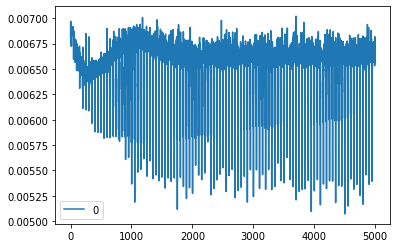

In [21]:
#plotting the rmse values against num_of_trees values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [23]:
#Fitting XGB regressor 
model_xgb = xgb.XGBRegressor(random_state=42,silent=True)
model_xgb.fit(X_train,y_train)
print(model_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)


In [24]:
pred=model_xgb.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for max_depth= ' , 3 , 'and num_of_trees = ', 100, 'is:', error)

RMSE value for max_depth=  3 and num_of_trees =  100 is: 0.006080527220209235


In [25]:
rmse_val = [] #to store rmse values for different num_of_trees
for num_of_trees in range(100):
    num_of_trees = num_of_trees+1
    model_xgb = xgb.XGBRegressor(learning_rate=0.1, n_estimators= num_of_trees, random_state=42, silent=True)

    model_xgb.fit(X_train, y_train)  #fit the model
    pred=model_xgb.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for num_of_trees= ' , num_of_trees , 'is:', error)
    #print('Minimum RMSE value for depth_of_tree= ' , depth_of_tree , 'is:', min(depth_of_tree))

RMSE value for num_of_trees=  1 is: 0.44823891290634876
RMSE value for num_of_trees=  2 is: 0.4038572825845662
RMSE value for num_of_trees=  3 is: 0.3638804119919445
RMSE value for num_of_trees=  4 is: 0.32787138181990805
RMSE value for num_of_trees=  5 is: 0.2954367024817268
RMSE value for num_of_trees=  6 is: 0.26622184460732656
RMSE value for num_of_trees=  7 is: 0.23990757418163683
RMSE value for num_of_trees=  8 is: 0.21620628786621496
RMSE value for num_of_trees=  9 is: 0.19485894438463197
RMSE value for num_of_trees=  10 is: 0.1756322642067682
RMSE value for num_of_trees=  11 is: 0.1583161081996785
RMSE value for num_of_trees=  12 is: 0.1427212437081159
RMSE value for num_of_trees=  13 is: 0.12867720024761356
RMSE value for num_of_trees=  14 is: 0.11603051249796968
RMSE value for num_of_trees=  15 is: 0.10464293381769958
RMSE value for num_of_trees=  16 is: 0.09439000715264337
RMSE value for num_of_trees=  17 is: 0.08515966591637204
RMSE value for num_of_trees=  18 is: 0.0768509

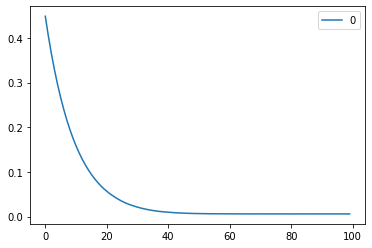

In [26]:
#plotting the rmse values against num_of_trees values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [27]:
rmse_val = [] #to store rmse values for different depth_of_tree
for depth_of_tree in range(100):
    depth_of_tree = depth_of_tree+1
    model_xgb = xgb.XGBRegressor(learning_rate=0.1, max_depth= depth_of_tree, random_state=42, silent=True)

    model_xgb.fit(X_train, y_train)  #fit the model
    pred=model_xgb.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for depth_of_tree= ' , depth_of_tree , 'is:', error)
    #print('Minimum RMSE value for depth_of_tree= ' , depth_of_tree , 'is:', min(depth_of_tree))

RMSE value for depth_of_tree=  1 is: 0.006000995786263178
RMSE value for depth_of_tree=  2 is: 0.006659733468835571
RMSE value for depth_of_tree=  3 is: 0.006080527220209235
RMSE value for depth_of_tree=  4 is: 0.006362733512273133
RMSE value for depth_of_tree=  5 is: 0.0058936689184039045
RMSE value for depth_of_tree=  6 is: 0.006084902881684824
RMSE value for depth_of_tree=  7 is: 0.006119384530028436
RMSE value for depth_of_tree=  8 is: 0.006144696671545502
RMSE value for depth_of_tree=  9 is: 0.006122203059159532
RMSE value for depth_of_tree=  10 is: 0.006122203059159532
RMSE value for depth_of_tree=  11 is: 0.006122203059159532
RMSE value for depth_of_tree=  12 is: 0.006122203059159532
RMSE value for depth_of_tree=  13 is: 0.006122203059159532
RMSE value for depth_of_tree=  14 is: 0.006122203059159532
RMSE value for depth_of_tree=  15 is: 0.006122203059159532
RMSE value for depth_of_tree=  16 is: 0.006122203059159532
RMSE value for depth_of_tree=  17 is: 0.006122203059159532
RMSE 

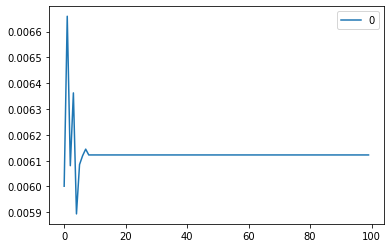

In [28]:
#plotting the rmse values against num_of_trees values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [29]:
rmse_val = [] #to store rmse values for different num_of_trees
for num_of_trees in range(100):
    num_of_trees = num_of_trees+1
    for tree_depth in range(50):
        tree_depth = tree_depth+1
        model_xgb = xgb.XGBRegressor(n_estimators = num_of_trees, max_depth = tree_depth, random_state=42, silent=True)

        model_xgb.fit(X_train, y_train)  #fit the model
        pred=model_xgb.predict(X_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        print('RMSE value for num_trees= ' , num_of_trees , 'and for tree_depth= ', tree_depth, 'is:', error)
        #print('Minimum RMSE value for num_of_trees= ' , num_of_trees , 'is:', min(num_of_trees))

RMSE value for num_trees=  1 and for tree_depth=  1 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  2 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  3 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  4 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  5 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  6 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  7 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  8 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  9 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  10 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  11 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  12 is: 0.44823891290634876
RMSE value for num_trees=  1 and for tree_depth=  13 is: 0.44823891290634876
RMSE val

RMSE value for num_trees=  3 and for tree_depth=  28 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  29 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  30 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  31 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  32 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  33 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  34 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  35 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  36 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  37 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  38 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  39 is: 0.3638804119919445
RMSE value for num_trees=  3 and for tree_depth=  40 is: 0.3638804119919445
RMSE value f

RMSE value for num_trees=  6 and for tree_depth=  2 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  3 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  4 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  5 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  6 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  7 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  8 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  9 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  10 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  11 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  12 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  13 is: 0.26622184460732656
RMSE value for num_trees=  6 and for tree_depth=  14 is: 0.26622184460732656
RMSE va

RMSE value for num_trees=  8 and for tree_depth=  19 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  20 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  21 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  22 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  23 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  24 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  25 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  26 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  27 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  28 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  29 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  30 is: 0.21620628786621496
RMSE value for num_trees=  8 and for tree_depth=  31 is: 0.21620628786621496

RMSE value for num_trees=  10 and for tree_depth=  28 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  29 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  30 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  31 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  32 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  33 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  34 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  35 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  36 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  37 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  38 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  39 is: 0.1756322642067682
RMSE value for num_trees=  10 and for tree_depth=  40 is: 0.1756322642067682

RMSE value for num_trees=  13 and for tree_depth=  3 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  4 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  5 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  6 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  7 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  8 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  9 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  10 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  11 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  12 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  13 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  14 is: 0.12867720024761356
RMSE value for num_trees=  13 and for tree_depth=  15 is: 0.12867720024

RMSE value for num_trees=  15 and for tree_depth=  25 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  26 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  27 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  28 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  29 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  30 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  31 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  32 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  33 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  34 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  35 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  36 is: 0.10464293381769958
RMSE value for num_trees=  15 and for tree_depth=  37 is: 0.1046

RMSE value for num_trees=  17 and for tree_depth=  48 is: 0.08515966591637204
RMSE value for num_trees=  17 and for tree_depth=  49 is: 0.08515966591637204
RMSE value for num_trees=  17 and for tree_depth=  50 is: 0.08515966591637204
RMSE value for num_trees=  18 and for tree_depth=  1 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  2 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  3 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  4 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  5 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  6 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  7 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  8 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  9 is: 0.07685098388800318
RMSE value for num_trees=  18 and for tree_depth=  10 is: 0.0768509838880

RMSE value for num_trees=  20 and for tree_depth=  3 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  4 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  5 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  6 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  7 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  8 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  9 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  10 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  11 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  12 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  13 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  14 is: 0.06264440228959248
RMSE value for num_trees=  20 and for tree_depth=  15 is: 0.06264440228

RMSE value for num_trees=  22 and for tree_depth=  26 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  27 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  28 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  29 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  30 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  31 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  32 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  33 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  34 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  35 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  36 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  37 is: 0.051207822601714796
RMSE value for num_trees=  22 and for tree_depth=  3

RMSE value for num_trees=  24 and for tree_depth=  46 is: 0.04196778677544348
RMSE value for num_trees=  24 and for tree_depth=  47 is: 0.04196778677544348
RMSE value for num_trees=  24 and for tree_depth=  48 is: 0.04196778677544348
RMSE value for num_trees=  24 and for tree_depth=  49 is: 0.04196778677544348
RMSE value for num_trees=  24 and for tree_depth=  50 is: 0.04196778677544348
RMSE value for num_trees=  25 and for tree_depth=  1 is: 0.03777063381625724
RMSE value for num_trees=  25 and for tree_depth=  2 is: 0.03798693730116469
RMSE value for num_trees=  25 and for tree_depth=  3 is: 0.037879597156675486
RMSE value for num_trees=  25 and for tree_depth=  4 is: 0.037903960391518755
RMSE value for num_trees=  25 and for tree_depth=  5 is: 0.03792112260673614
RMSE value for num_trees=  25 and for tree_depth=  6 is: 0.03792112260673614
RMSE value for num_trees=  25 and for tree_depth=  7 is: 0.03792112260673614
RMSE value for num_trees=  25 and for tree_depth=  8 is: 0.0379211226

RMSE value for num_trees=  27 and for tree_depth=  9 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  10 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  11 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  12 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  13 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  14 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  15 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  16 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  17 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  18 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  19 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  20 is: 0.03107225433595965
RMSE value for num_trees=  27 and for tree_depth=  21 is: 0.03107

RMSE value for num_trees=  29 and for tree_depth=  25 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  26 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  27 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  28 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  29 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  30 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  31 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  32 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  33 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  34 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  35 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  36 is: 0.02563106625720916
RMSE value for num_trees=  29 and for tree_depth=  37 is: 0.0256

RMSE value for num_trees=  31 and for tree_depth=  31 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  32 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  33 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  34 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  35 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  36 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  37 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  38 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  39 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  40 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  41 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  42 is: 0.021365327093159244
RMSE value for num_trees=  31 and for tree_depth=  4

RMSE value for num_trees=  33 and for tree_depth=  45 is: 0.017970095301873306
RMSE value for num_trees=  33 and for tree_depth=  46 is: 0.017970095301873306
RMSE value for num_trees=  33 and for tree_depth=  47 is: 0.017970095301873306
RMSE value for num_trees=  33 and for tree_depth=  48 is: 0.017970095301873306
RMSE value for num_trees=  33 and for tree_depth=  49 is: 0.017970095301873306
RMSE value for num_trees=  33 and for tree_depth=  50 is: 0.017970095301873306
RMSE value for num_trees=  34 and for tree_depth=  1 is: 0.01595074672482473
RMSE value for num_trees=  34 and for tree_depth=  2 is: 0.01660798612315635
RMSE value for num_trees=  34 and for tree_depth=  3 is: 0.01619223445447882
RMSE value for num_trees=  34 and for tree_depth=  4 is: 0.016448591576426197
RMSE value for num_trees=  34 and for tree_depth=  5 is: 0.01654596174495703
RMSE value for num_trees=  34 and for tree_depth=  6 is: 0.016517975777463324
RMSE value for num_trees=  34 and for tree_depth=  7 is: 0.016

RMSE value for num_trees=  36 and for tree_depth=  1 is: 0.013411620266780253
RMSE value for num_trees=  36 and for tree_depth=  2 is: 0.014138154594311508
RMSE value for num_trees=  36 and for tree_depth=  3 is: 0.013698317210969823
RMSE value for num_trees=  36 and for tree_depth=  4 is: 0.014009822786273388
RMSE value for num_trees=  36 and for tree_depth=  5 is: 0.013971631218396641
RMSE value for num_trees=  36 and for tree_depth=  6 is: 0.014124951616181549
RMSE value for num_trees=  36 and for tree_depth=  7 is: 0.014125649145237779
RMSE value for num_trees=  36 and for tree_depth=  8 is: 0.014125649145237779
RMSE value for num_trees=  36 and for tree_depth=  9 is: 0.014125649145237779
RMSE value for num_trees=  36 and for tree_depth=  10 is: 0.014125649145237779
RMSE value for num_trees=  36 and for tree_depth=  11 is: 0.014125649145237779
RMSE value for num_trees=  36 and for tree_depth=  12 is: 0.014125649145237779
RMSE value for num_trees=  36 and for tree_depth=  13 is: 0.0

RMSE value for num_trees=  38 and for tree_depth=  6 is: 0.012142592500957517
RMSE value for num_trees=  38 and for tree_depth=  7 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  8 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  9 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  10 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  11 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  12 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  13 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  14 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  15 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  16 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  17 is: 0.012140528633166956
RMSE value for num_trees=  38 and for tree_depth=  18 is

RMSE value for num_trees=  40 and for tree_depth=  19 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  20 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  21 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  22 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  23 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  24 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  25 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  26 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  27 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  28 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  29 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  30 is: 0.010778618884535875
RMSE value for num_trees=  40 and for tree_depth=  3

RMSE value for num_trees=  42 and for tree_depth=  24 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  25 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  26 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  27 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  28 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  29 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  30 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  31 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  32 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  33 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  34 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  35 is: 0.00978374158404299
RMSE value for num_trees=  42 and for tree_depth=  36 is: 0.0097

RMSE value for num_trees=  44 and for tree_depth=  37 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  38 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  39 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  40 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  41 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  42 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  43 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  44 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  45 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  46 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  47 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  48 is: 0.008934407276733676
RMSE value for num_trees=  44 and for tree_depth=  4

RMSE value for num_trees=  46 and for tree_depth=  45 is: 0.008171485798167375
RMSE value for num_trees=  46 and for tree_depth=  46 is: 0.008171485798167375
RMSE value for num_trees=  46 and for tree_depth=  47 is: 0.008171485798167375
RMSE value for num_trees=  46 and for tree_depth=  48 is: 0.008171485798167375
RMSE value for num_trees=  46 and for tree_depth=  49 is: 0.008171485798167375
RMSE value for num_trees=  46 and for tree_depth=  50 is: 0.008171485798167375
RMSE value for num_trees=  47 and for tree_depth=  1 is: 0.007104303565428503
RMSE value for num_trees=  47 and for tree_depth=  2 is: 0.008063315681035698
RMSE value for num_trees=  47 and for tree_depth=  3 is: 0.007524154946405083
RMSE value for num_trees=  47 and for tree_depth=  4 is: 0.007842207167561805
RMSE value for num_trees=  47 and for tree_depth=  5 is: 0.007648260260391158
RMSE value for num_trees=  47 and for tree_depth=  6 is: 0.007878032554608437
RMSE value for num_trees=  47 and for tree_depth=  7 is: 0

RMSE value for num_trees=  49 and for tree_depth=  6 is: 0.007413294249242194
RMSE value for num_trees=  49 and for tree_depth=  7 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  8 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  9 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  10 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  11 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  12 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  13 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  14 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  15 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  16 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  17 is: 0.007350521452638072
RMSE value for num_trees=  49 and for tree_depth=  18 is

RMSE value for num_trees=  51 and for tree_depth=  16 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  17 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  18 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  19 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  20 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  21 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  22 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  23 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  24 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  25 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  26 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  27 is: 0.007141453112496852
RMSE value for num_trees=  51 and for tree_depth=  2

RMSE value for num_trees=  53 and for tree_depth=  21 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  22 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  23 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  24 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  25 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  26 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  27 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  28 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  29 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  30 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  31 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  32 is: 0.006959569377802521
RMSE value for num_trees=  53 and for tree_depth=  3

RMSE value for num_trees=  55 and for tree_depth=  28 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  29 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  30 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  31 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  32 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  33 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  34 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  35 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  36 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  37 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  38 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  39 is: 0.006766968769494315
RMSE value for num_trees=  55 and for tree_depth=  4

RMSE value for num_trees=  57 and for tree_depth=  35 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  36 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  37 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  38 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  39 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  40 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  41 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  42 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  43 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  44 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  45 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  46 is: 0.006626413118813471
RMSE value for num_trees=  57 and for tree_depth=  4

RMSE value for num_trees=  59 and for tree_depth=  39 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  40 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  41 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  42 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  43 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  44 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  45 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  46 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  47 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  48 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  49 is: 0.006527795474593341
RMSE value for num_trees=  59 and for tree_depth=  50 is: 0.006527795474593341
RMSE value for num_trees=  60 and for tree_depth=  1

RMSE value for num_trees=  61 and for tree_depth=  46 is: 0.0064577486968000536
RMSE value for num_trees=  61 and for tree_depth=  47 is: 0.0064577486968000536
RMSE value for num_trees=  61 and for tree_depth=  48 is: 0.0064577486968000536
RMSE value for num_trees=  61 and for tree_depth=  49 is: 0.0064577486968000536
RMSE value for num_trees=  61 and for tree_depth=  50 is: 0.0064577486968000536
RMSE value for num_trees=  62 and for tree_depth=  1 is: 0.005892808071216438
RMSE value for num_trees=  62 and for tree_depth=  2 is: 0.006737277205516202
RMSE value for num_trees=  62 and for tree_depth=  3 is: 0.006238039907703825
RMSE value for num_trees=  62 and for tree_depth=  4 is: 0.006492185233790031
RMSE value for num_trees=  62 and for tree_depth=  5 is: 0.006179109405533802
RMSE value for num_trees=  62 and for tree_depth=  6 is: 0.006322394699649768
RMSE value for num_trees=  62 and for tree_depth=  7 is: 0.006385213417646372
RMSE value for num_trees=  62 and for tree_depth=  8 i

RMSE value for num_trees=  64 and for tree_depth=  5 is: 0.006127287913863095
RMSE value for num_trees=  64 and for tree_depth=  6 is: 0.006249343462947413
RMSE value for num_trees=  64 and for tree_depth=  7 is: 0.006337877900381549
RMSE value for num_trees=  64 and for tree_depth=  8 is: 0.006358850819675194
RMSE value for num_trees=  64 and for tree_depth=  9 is: 0.006365448640693277
RMSE value for num_trees=  64 and for tree_depth=  10 is: 0.006365448640693277
RMSE value for num_trees=  64 and for tree_depth=  11 is: 0.006365448640693277
RMSE value for num_trees=  64 and for tree_depth=  12 is: 0.006365448640693277
RMSE value for num_trees=  64 and for tree_depth=  13 is: 0.006365448640693277
RMSE value for num_trees=  64 and for tree_depth=  14 is: 0.006365448640693277
RMSE value for num_trees=  64 and for tree_depth=  15 is: 0.006365448640693277
RMSE value for num_trees=  64 and for tree_depth=  16 is: 0.006365448640693277
RMSE value for num_trees=  64 and for tree_depth=  17 is:

RMSE value for num_trees=  66 and for tree_depth=  9 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  10 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  11 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  12 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  13 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  14 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  15 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  16 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  17 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  18 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  19 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  20 is: 0.006320907909063186
RMSE value for num_trees=  66 and for tree_depth=  21

RMSE value for num_trees=  68 and for tree_depth=  13 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  14 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  15 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  16 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  17 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  18 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  19 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  20 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  21 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  22 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  23 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  24 is: 0.006286796618602552
RMSE value for num_trees=  68 and for tree_depth=  2

RMSE value for num_trees=  70 and for tree_depth=  18 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  19 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  20 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  21 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  22 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  23 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  24 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  25 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  26 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  27 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  28 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  29 is: 0.006260639669645517
RMSE value for num_trees=  70 and for tree_depth=  3

RMSE value for num_trees=  72 and for tree_depth=  24 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  25 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  26 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  27 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  28 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  29 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  30 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  31 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  32 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  33 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  34 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  35 is: 0.006232243218414527
RMSE value for num_trees=  72 and for tree_depth=  3

RMSE value for num_trees=  74 and for tree_depth=  29 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  30 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  31 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  32 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  33 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  34 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  35 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  36 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  37 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  38 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  39 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  40 is: 0.006195066842250222
RMSE value for num_trees=  74 and for tree_depth=  4

RMSE value for num_trees=  76 and for tree_depth=  35 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  36 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  37 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  38 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  39 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  40 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  41 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  42 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  43 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  44 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  45 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  46 is: 0.006173488541143994
RMSE value for num_trees=  76 and for tree_depth=  4

RMSE value for num_trees=  78 and for tree_depth=  40 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  41 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  42 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  43 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  44 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  45 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  46 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  47 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  48 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  49 is: 0.006162533562934031
RMSE value for num_trees=  78 and for tree_depth=  50 is: 0.006162533562934031
RMSE value for num_trees=  79 and for tree_depth=  1 is: 0.005841345800315647
RMSE value for num_trees=  79 and for tree_depth=  2 

RMSE value for num_trees=  80 and for tree_depth=  47 is: 0.006154537967498387
RMSE value for num_trees=  80 and for tree_depth=  48 is: 0.006154537967498387
RMSE value for num_trees=  80 and for tree_depth=  49 is: 0.006154537967498387
RMSE value for num_trees=  80 and for tree_depth=  50 is: 0.006154537967498387
RMSE value for num_trees=  81 and for tree_depth=  1 is: 0.0058639510286305095
RMSE value for num_trees=  81 and for tree_depth=  2 is: 0.006588874717625434
RMSE value for num_trees=  81 and for tree_depth=  3 is: 0.006080632571453916
RMSE value for num_trees=  81 and for tree_depth=  4 is: 0.006388474253260434
RMSE value for num_trees=  81 and for tree_depth=  5 is: 0.005914499627232062
RMSE value for num_trees=  81 and for tree_depth=  6 is: 0.006114903239295545
RMSE value for num_trees=  81 and for tree_depth=  7 is: 0.006148073298076389
RMSE value for num_trees=  81 and for tree_depth=  8 is: 0.006171990783871988
RMSE value for num_trees=  81 and for tree_depth=  9 is: 0.

RMSE value for num_trees=  83 and for tree_depth=  3 is: 0.006091748564633391
RMSE value for num_trees=  83 and for tree_depth=  4 is: 0.006379782112221801
RMSE value for num_trees=  83 and for tree_depth=  5 is: 0.005908213235779705
RMSE value for num_trees=  83 and for tree_depth=  6 is: 0.006108390335793897
RMSE value for num_trees=  83 and for tree_depth=  7 is: 0.006141916559853814
RMSE value for num_trees=  83 and for tree_depth=  8 is: 0.0061658774827765064
RMSE value for num_trees=  83 and for tree_depth=  9 is: 0.006143776207175231
RMSE value for num_trees=  83 and for tree_depth=  10 is: 0.006143776207175231
RMSE value for num_trees=  83 and for tree_depth=  11 is: 0.006143776207175231
RMSE value for num_trees=  83 and for tree_depth=  12 is: 0.006143776207175231
RMSE value for num_trees=  83 and for tree_depth=  13 is: 0.006143776207175231
RMSE value for num_trees=  83 and for tree_depth=  14 is: 0.006143776207175231
RMSE value for num_trees=  83 and for tree_depth=  15 is: 

RMSE value for num_trees=  85 and for tree_depth=  8 is: 0.006161141577883677
RMSE value for num_trees=  85 and for tree_depth=  9 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  10 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  11 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  12 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  13 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  14 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  15 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  16 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  17 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  18 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  19 is: 0.006138779219619654
RMSE value for num_trees=  85 and for tree_depth=  20 

RMSE value for num_trees=  87 and for tree_depth=  13 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  14 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  15 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  16 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  17 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  18 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  19 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  20 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  21 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  22 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  23 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  24 is: 0.006134765624571946
RMSE value for num_trees=  87 and for tree_depth=  2

RMSE value for num_trees=  89 and for tree_depth=  19 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  20 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  21 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  22 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  23 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  24 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  25 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  26 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  27 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  28 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  29 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  30 is: 0.006131539248522431
RMSE value for num_trees=  89 and for tree_depth=  3

RMSE value for num_trees=  91 and for tree_depth=  23 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  24 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  25 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  26 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  27 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  28 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  29 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  30 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  31 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  32 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  33 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  34 is: 0.006128943415188114
RMSE value for num_trees=  91 and for tree_depth=  3

RMSE value for num_trees=  93 and for tree_depth=  28 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  29 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  30 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  31 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  32 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  33 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  34 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  35 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  36 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  37 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  38 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  39 is: 0.006126842862376843
RMSE value for num_trees=  93 and for tree_depth=  4

RMSE value for num_trees=  95 and for tree_depth=  34 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  35 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  36 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  37 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  38 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  39 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  40 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  41 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  42 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  43 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  44 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  45 is: 0.006125150415785795
RMSE value for num_trees=  95 and for tree_depth=  4

RMSE value for num_trees=  97 and for tree_depth=  40 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  41 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  42 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  43 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  44 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  45 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  46 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  47 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  48 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  49 is: 0.006123781705044304
RMSE value for num_trees=  97 and for tree_depth=  50 is: 0.006123781705044304
RMSE value for num_trees=  98 and for tree_depth=  1 is: 0.005975201646036813
RMSE value for num_trees=  98 and for tree_depth=  2 

RMSE value for num_trees=  99 and for tree_depth=  46 is: 0.006122675962724271
RMSE value for num_trees=  99 and for tree_depth=  47 is: 0.006122675962724271
RMSE value for num_trees=  99 and for tree_depth=  48 is: 0.006122675962724271
RMSE value for num_trees=  99 and for tree_depth=  49 is: 0.006122675962724271
RMSE value for num_trees=  99 and for tree_depth=  50 is: 0.006122675962724271
RMSE value for num_trees=  100 and for tree_depth=  1 is: 0.006000995786263178
RMSE value for num_trees=  100 and for tree_depth=  2 is: 0.006659733468835571
RMSE value for num_trees=  100 and for tree_depth=  3 is: 0.006080527220209235
RMSE value for num_trees=  100 and for tree_depth=  4 is: 0.006362733512273133
RMSE value for num_trees=  100 and for tree_depth=  5 is: 0.0058936689184039045
RMSE value for num_trees=  100 and for tree_depth=  6 is: 0.006084902881684824
RMSE value for num_trees=  100 and for tree_depth=  7 is: 0.006119384530028436
RMSE value for num_trees=  100 and for tree_depth= 

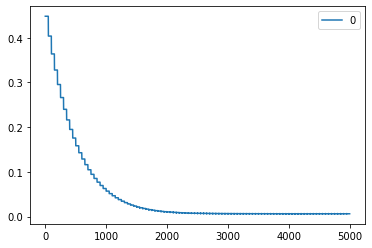

In [30]:
#plotting the rmse values against num_of_trees values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [31]:
train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)